# MultiGroupDirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.1.0']


## Utility function
We define a utility function to draw the directed acyclic graph.

In [2]:
def make_graph(adjacency_matrix):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(f'x{from_}', f'x{to}', label=f'{coef:.2f}')
    return d

## Test data
We generate two datasets consisting of 6 variables.

In [3]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,2.394708,15.312359,3.685054,0.548814,15.780259,9.948090
1,2.325771,16.145216,4.332293,0.715189,14.335879,9.514409
2,2.197313,15.848718,4.539881,0.602763,14.027410,9.266158
3,1.672250,13.200354,3.675534,0.544883,10.421554,6.771233
4,1.282752,11.337503,3.486211,0.423655,7.533376,5.368668


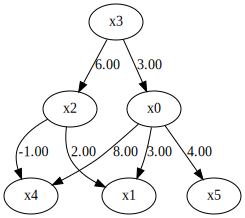

In [4]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_graph(m)

In [5]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,3.848617,29.790327,6.151635,0.927955,23.683228,17.497765
1,3.765482,28.839731,5.981344,0.902937,23.362070,17.126491
2,1.613042,13.637872,2.930467,0.427617,9.871720,7.578267
3,1.838085,16.640591,3.715235,0.510806,10.427863,9.068131
4,2.321607,19.614986,4.540952,0.583200,13.276292,11.184535


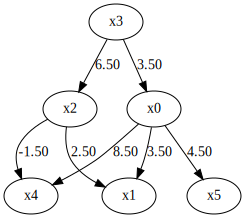

In [6]:
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.5, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_graph(m)

We create a list variable that contains two datasets.

In [7]:
X_list = [X1, X2]

## Causal Discovery
To run causal discovery for multiple datasets, we create a `MultiGroupDirectLiNGAM` object and call the `fit` method.

In [8]:
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [9]:
model.causal_order_

[3, 2, 0, 1, 5, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery. As you can see from the following, DAG in each dataset is correctly estimated.

[[ 0.     0.     0.     3.006  0.     0.   ]
 [ 3.002  0.     1.996  0.     0.     0.   ]
 [ 0.     0.     0.     6.001  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 7.978  0.    -0.988  0.     0.     0.   ]
 [ 3.998  0.     0.     0.     0.     0.   ]]


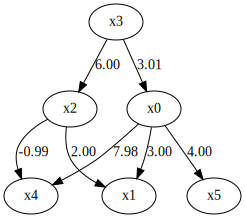

In [10]:
print(model.adjacency_matrices_[0])
make_graph(model.adjacency_matrices_[0])

[[ 0.     0.     0.043  3.245  0.     0.   ]
 [ 3.508  0.     2.491  0.     0.     0.   ]
 [ 0.     0.     0.     6.481  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 7.519  0.    -0.942  0.     0.     0.   ]
 [ 4.422  0.     0.     0.     0.     0.   ]]


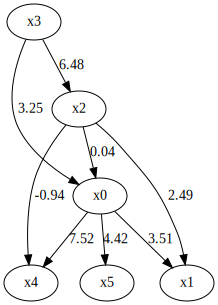

In [11]:
print(model.adjacency_matrices_[1])
make_graph(model.adjacency_matrices_[1])

To compare, we run DirectLiNGAM with single dataset concatenating two datasets.

In [12]:
X_all = pd.concat([X1, X2])
print(X_all.shape)

(11000, 6)


In [13]:
model_all = lingam.DirectLiNGAM()
model_all.fit(X_all)

model_all.causal_order_

[3, 4, 5, 2, 1, 0]

You can see that the causal structure cannot be estimated correctly for a single dataset.

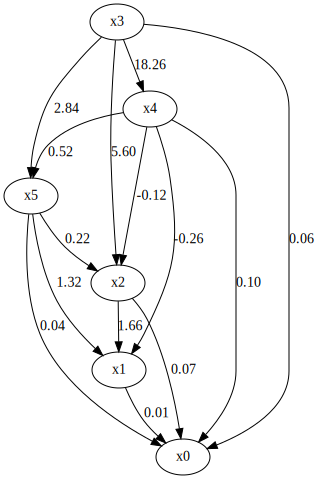

In [14]:
make_graph(model_all.adjacency_matrix_)

## Bootstrapping
In `MultiGroupDirectLiNGAM`, bootstrap can be executed in the same way as normal `DirectLiNGAM`.

In [15]:
results = model.bootstrap(X_list, 100)

The `bootstrap` method returns a list of multiple `BootstrapResult`, so you can get the result of bootstrapping from the list.

In [16]:
cdc = results[0].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x2 <--- x3  (100.0%)
x4 <--- x0  (100.0%)
x4 <--- x2  (100.0%)
x5 <--- x0  (100.0%)
x0 <--- x2  (14.0%)


In [17]:
cdc = results[1].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x2 <--- x3  (100.0%)
x4 <--- x0  (100.0%)
x4 <--- x2  (100.0%)
x5 <--- x0  (100.0%)
x0 <--- x2  (45.0%)


In [18]:
dagc = results[0].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 75.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[1]: 14.0%
	x0 <--- x2 
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[2]: 6.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 


In [19]:
dagc = results[1].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 26.0%
	x0 <--- x2 
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[1]: 22.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[2]: 13.0%
	x0 <--- x2 
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x4 <--- x5 
	x5 <--- x0 
